## VGG ARCHITECTURE

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Import TensorFlow and check its version
import tensorflow
import tensorflow as tf
print(tf.__version__)

# Import Keras and its backend
import keras
import keras.backend as K

# Import various layers and utilities from Keras
from keras.models import Model
from keras.layers import Input, Dense, Conv2D, Conv3D, DepthwiseConv2D, SeparableConv2D, Conv3DTranspose
from keras.layers import Flatten, MaxPool2D, AvgPool2D, GlobalAvgPool2D, UpSampling2D, BatchNormalization
from keras.layers import Concatenate, Add, Dropout, ReLU, Lambda, Activation, LeakyReLU, PReLU

# Import utilities for visualization
from IPython.display import SVG
from keras.utils import model_to_dot

# Import time-related functions and numpy for numerical computations
from time import time
import numpy as np

# Import callback functions for monitoring and controlling the training process
from keras.callbacks import ModelCheckpoint
from tensorflow.keras.callbacks import EarlyStopping

# Suppress warnings to keep the output clean
import warnings
warnings.filterwarnings('ignore')



2.15.0


In [3]:
# from tensorflow.keras.preprocessing.image import ImageDataGenerator

# train=ImageDataGenerator(rescale=1./255,shear_range=0.2,zoom_range=0.2,horizontal_flip=True,validation_split = 0.2)
# train_data=train.flow_from_directory(directory = 'DATASET/TRAIN',target_size=(224,224),
#                                      batch_size=32,class_mode='categorical')
# Import ImageDataGenerator from Keras for image preprocessing
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define an ImageDataGenerator for training data
train = ImageDataGenerator(
    rescale=1./255,             # Rescale pixel values to the range [0, 1]
    shear_range=0.2,            # Apply shear transformation with a range of 0.2 radians
    zoom_range=0.2,             # Apply zoom transformation with a range of 0.2
    horizontal_flip=True,       # Randomly flip images horizontally
    validation_split=0.2        # Fraction of images to set aside for validation
)

# Generate batches of augmented data from the directory 'DATASET/TRAIN'
train_data = train.flow_from_directory(
    directory='DATASET/TRAIN',    # Directory containing the training images
    target_size=(224, 224),       # Resize images to 224x224 pixels
    batch_size=32,                # Number of samples per batch
    class_mode='categorical'      # Type of label (categorical for one-hot encoded labels)
)


Found 789 images belonging to 8 classes.


In [4]:
# test=ImageDataGenerator(rescale=1./255)
# test_data=test.flow_from_directory(directory = 'DATASET/TEST',target_size=(224,224),
#                                    batch_size=32,class_mode='categorical')
# Define an ImageDataGenerator for test data
test = ImageDataGenerator(
    rescale=1./255             # Rescale pixel values to the range [0, 1]
)

# Generate batches of test data from the directory 'DATASET/TEST'
test_data = test.flow_from_directory(
    directory='DATASET/TEST',    # Directory containing the test images
    target_size=(224, 224),      # Resize images to 224x224 pixels
    batch_size=32,               # Number of samples per batch
    class_mode='categorical'     # Type of label (categorical for one-hot encoded labels)
)


Found 789 images belonging to 8 classes.


In [5]:
# Import necessary modules
import tensorflow.keras.backend as K
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Conv2D, MaxPool2D, Flatten

# Define the VGG function to create the model
def vgg(input_shape, n_classes):
    # Define the input layer
    input = Input(input_shape)
    
    # First convolutional block
    x = Conv2D(64, 3, padding='same', activation='relu')(input)
    x = Conv2D(64, 3, padding='same', activation='relu')(x)
    x = MaxPool2D(2, strides=2, padding='same')(x)
    
    # Intermediate convolutional blocks (with increasing filter numbers)
    x = Conv2D(128, 3, padding='same', activation='relu')(x)
    x = Conv2D(128, 3, padding='same', activation='relu')(x)
    x = MaxPool2D(2, strides=2, padding='same')(x)
    
    x = Conv2D(256, 3, padding='same', activation='relu')(x)
    x = Conv2D(256, 3, padding='same', activation='relu')(x)
    x = Conv2D(256, 3, padding='same', activation='relu')(x)
    x = MaxPool2D(2, strides=2, padding='same')(x)
    
    x = Conv2D(512, 3, padding='same', activation='relu')(x)
    x = Conv2D(512, 3, padding='same', activation='relu')(x)
    x = Conv2D(512, 3, padding='same', activation='relu')(x)
    x = MaxPool2D(2, strides=2, padding='same')(x)
    
    x = Conv2D(512, 3, padding='same', activation='relu')(x)
    x = Conv2D(512, 3, padding='same', activation='relu')(x)
    x = Conv2D(512, 3, padding='same', activation='relu')(x)
    x = MaxPool2D(2, strides=2, padding='same')(x)
    
    # Flatten the feature maps
    x = Flatten()(x)
    
    # Fully connected layers
    x = Dense(4096, activation='relu')(x)
    x = Dense(4096, activation='relu')(x)
    
    # Output layer
    output = Dense(n_classes, activation='softmax')(x)
    
    # Create the model
    model = Model(input, output)
    
    # Compile the model
    model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['accuracy', tf.keras.metrics.Precision()])
    
    # Return the compiled model
    return model

# Define input shape and number of classes
input_shape = 224, 224, 3
n_classes = 8

# Clear the session
K.clear_session()

# Create the VGG model
model = vgg(input_shape, n_classes)

# Print model summary
model.summary()





Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv2d (Conv2D)             (None, 224, 224, 64)      1792      
                                                                 
 conv2d_1 (Conv2D)           (None, 224, 224, 64)      36928     
                                                                 
 max_pooling2d (MaxPooling2  (None, 112, 112, 64)      0         
 D)                                                              
                                                                 
 conv2d_2 (Conv2D)           (None, 112, 112, 128)     73856     
                                                                 
 conv2d_3 (Conv2D)           (None, 112, 112, 128)     147584    
                                                          

In [6]:
#save the model fie
model_path = "ALEXNET.h5"

from keras.callbacks import ModelCheckpoint

M = ModelCheckpoint(model_path, monitor='accuracy', verbose=1, save_best_only=True)

In [7]:
epochs = 50
batch_size = 512

In [8]:
#### Fitting the model
history = model.fit(
           train_data, steps_per_epoch=train_data.samples // batch_size, 
           epochs=epochs, 
           validation_data=test_data,validation_steps=test_data.samples // batch_size,
           callbacks=[M])

Epoch 1/50


1/1 [==============================] - ETA: 0s - loss: 2.0791 - accuracy: 0.0938 - precision: 0.0000e+00
Epoch 1: accuracy improved from -inf to 0.09375, saving model to ALEXNET.h5
1/1 [==============================] - 22s 22s/step - loss: 2.0791 - accuracy: 0.0938 - precision: 0.0000e+00 - val_loss: 28.7565 - val_accuracy: 0.0938 - val_precision: 0.0938
Epoch 2/50
1/1 [==============================] - ETA: 0s - loss: 27.4298 - accuracy: 0.1250 - precision: 0.1250
Epoch 2: accuracy improved from 0.09375 to 0.12500, saving model to ALEXNET.h5
1/1 [==============================] - 20s 20s/step - loss: 27.4298 - accuracy: 0.1250 - precision: 0.1250 - val_loss: 2.0665 - val_accuracy: 0.1875 - val_precision: 0.0000e+00
Epoch 3/50
1/1 [==============================] - ETA: 0s - loss: 2.0723 - accuracy: 0.1875 - precision: 0.0000e+00
Epoch 3: accuracy improved from 0.12500 to 0.18750, saving model to ALEXNET.h5
1/1 [==============================] - 18s 18s/step - loss: 2.072

Epoch 23/50
1/1 [==============================] - ETA: 0s - loss: 1.9369 - accuracy: 0.2500 - precision: 0.0000e+00
Epoch 23: accuracy did not improve from 0.40625
1/1 [==============================] - 20s 20s/step - loss: 1.9369 - accuracy: 0.2500 - precision: 0.0000e+00 - val_loss: 2.1028 - val_accuracy: 0.1562 - val_precision: 0.0000e+00
Epoch 24/50
1/1 [==============================] - ETA: 0s - loss: 2.0624 - accuracy: 0.1905 - precision: 0.0000e+00
Epoch 24: accuracy did not improve from 0.40625
1/1 [==============================] - 15s 15s/step - loss: 2.0624 - accuracy: 0.1905 - precision: 0.0000e+00 - val_loss: 2.1007 - val_accuracy: 0.1250 - val_precision: 0.0000e+00
Epoch 25/50
1/1 [==============================] - ETA: 0s - loss: 2.2908 - accuracy: 0.1250 - precision: 0.0000e+00
Epoch 25: accuracy did not improve from 0.40625
1/1 [==============================] - 19s 19s/step - loss: 2.2908 - accuracy: 0.1250 - precision: 0.0000e+00 - val_loss: 1.9908 - val_accuracy: 

Epoch 47/50
1/1 [==============================] - ETA: 0s - loss: 1.8902 - accuracy: 0.1562 - precision: 0.0000e+00
Epoch 47: accuracy did not improve from 0.40625
1/1 [==============================] - 19s 19s/step - loss: 1.8902 - accuracy: 0.1562 - precision: 0.0000e+00 - val_loss: 1.9960 - val_accuracy: 0.2500 - val_precision: 0.0000e+00
Epoch 48/50
1/1 [==============================] - ETA: 0s - loss: 2.1168 - accuracy: 0.3125 - precision: 0.0000e+00
Epoch 48: accuracy did not improve from 0.40625
1/1 [==============================] - 20s 20s/step - loss: 2.1168 - accuracy: 0.3125 - precision: 0.0000e+00 - val_loss: 2.0832 - val_accuracy: 0.1875 - val_precision: 0.0000e+00
Epoch 49/50
1/1 [==============================] - ETA: 0s - loss: 1.9978 - accuracy: 0.2188 - precision: 0.0000e+00
Epoch 49: accuracy did not improve from 0.40625
1/1 [==============================] - 19s 19s/step - loss: 1.9978 - accuracy: 0.2188 - precision: 0.0000e+00 - val_loss: 1.9328 - val_accuracy: 

In [9]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'precision', 'val_loss', 'val_accuracy', 'val_precision'])

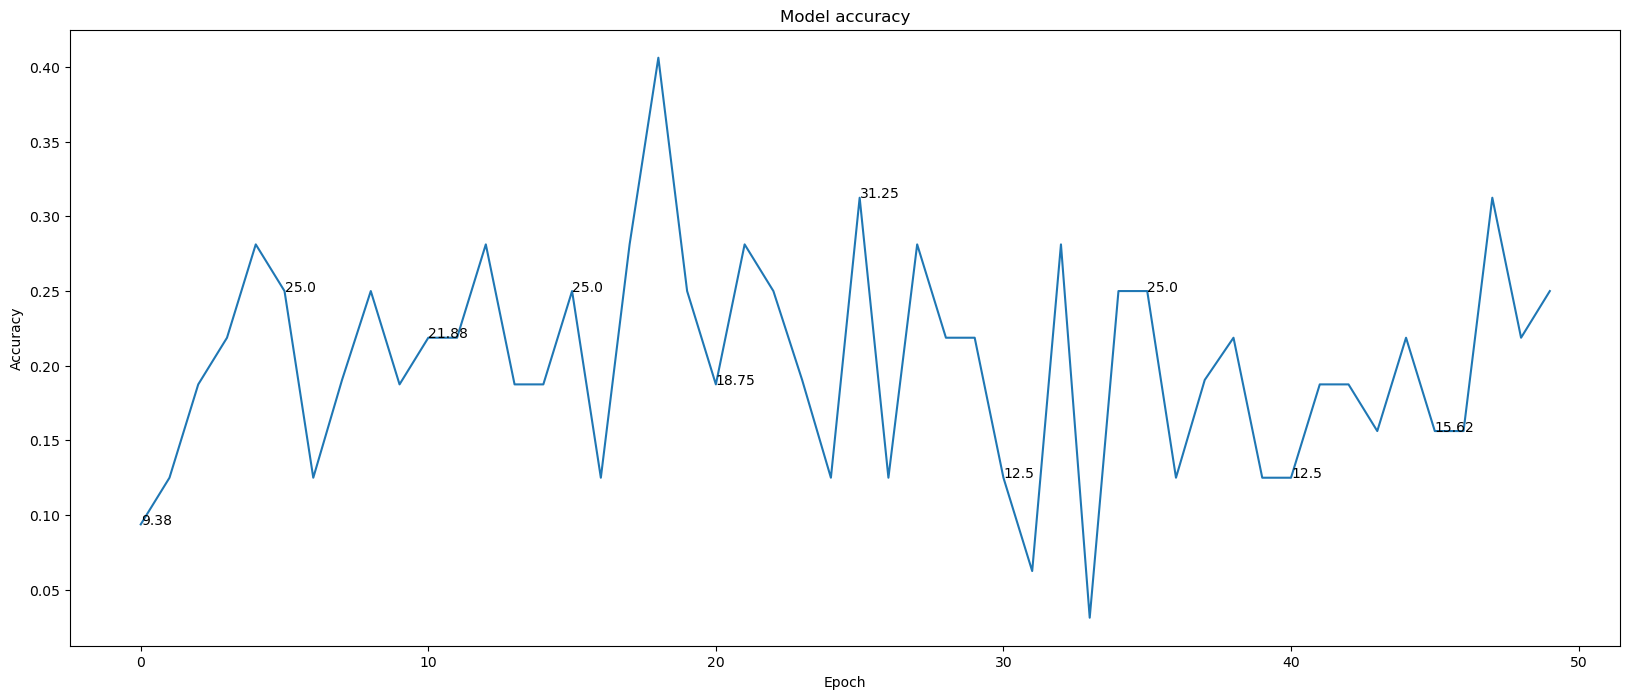

In [10]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(20, 8))
plt.plot(history.history['accuracy'])

for i in range(epochs):
    if i%5 == 0:
        plt.annotate(np.round(history.history['accuracy'][i]*100,2),xy=(i,history.history['accuracy'][i]))

plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.show()

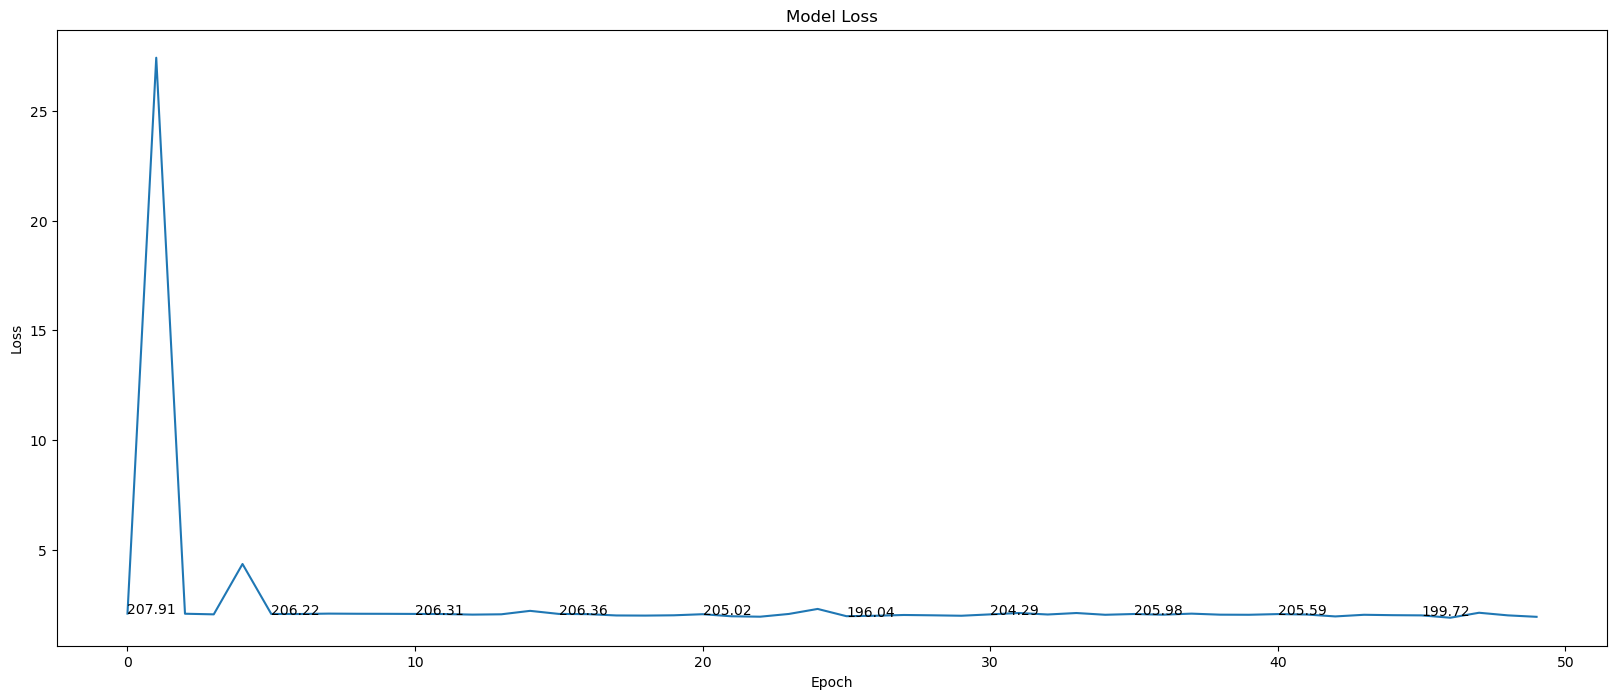

In [11]:
plt.figure(figsize=(20, 8))
plt.plot(history.history['loss'])

for i in range(epochs):
    if i%5 == 0:
        plt.annotate(np.round(history.history['loss'][i]*100,2),xy=(i,history.history['loss'][i]))

plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.show()